In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('train.csv')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB
None
   ID        date  meals_served  kitchen_staff  temperature_C  \
0   0  2022-12-19           196             13      27.887273   
1   1  2023-11-21           244        

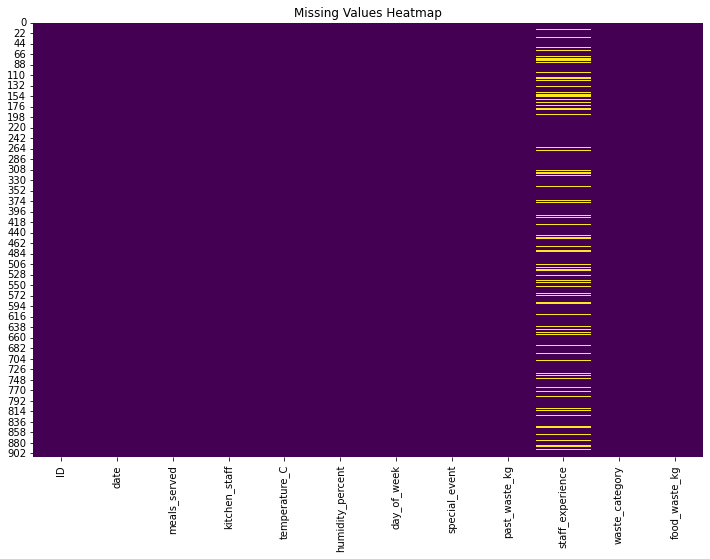

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 결측치 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



In [7]:

# 결측치 비율 계산
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio = missing_ratio[missing_ratio > 0]
missing_ratio

staff_experience    0.180022
dtype: float64

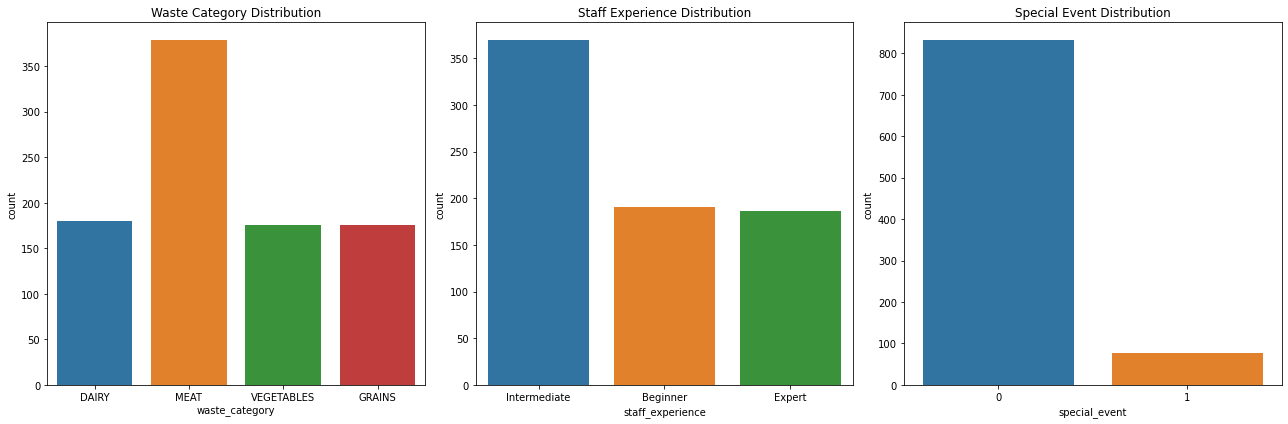

In [14]:
# Clean categorical columns
df['waste_category'] = df['waste_category'].str.upper().str.strip()
df['staff_experience'] = df['staff_experience'].str.title().str.strip()

# Plot categorical distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='waste_category', ax=axes[0])
axes[0].set_title('Waste Category Distribution')

sns.countplot(data=df, x='staff_experience', ax=axes[1])
axes[1].set_title('Staff Experience Distribution')

sns.countplot(data=df, x='special_event', ax=axes[2])
axes[2].set_title('Special Event Distribution')

plt.tight_layout()
plt.show()

       meals_served  kitchen_staff  temperature_C  humidity_percent  \
count    911.000000     911.000000     911.000000        911.000000   
mean     375.405049      11.900110      22.189280         60.761313   
std      502.812717       4.285153       8.922389         17.330821   
min      100.000000       5.000000     -10.372207         30.121111   
25%      211.000000       8.000000      15.684585         46.017835   
50%      306.000000      12.000000      22.115040         61.633960   
75%      407.000000      15.000000      28.804294         75.787910   
max     4730.000000      19.000000      60.000000         89.982828   

       past_waste_kg  food_waste_kg  
count     911.000000     911.000000  
mean       27.015691      44.842691  
std        12.774223      27.934366  
min         5.008394      10.819048  
25%        16.091383      32.887912  
50%        26.854109      41.146930  
75%        38.149878      50.046681  
max        49.803703     274.328783  


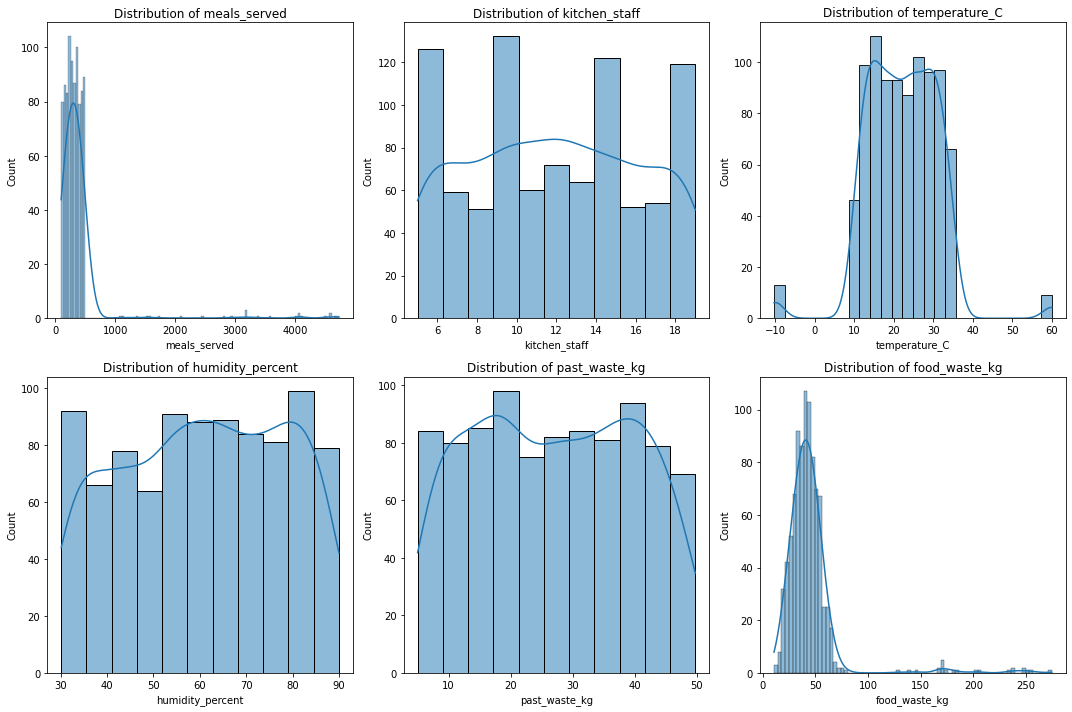

In [15]:
# Select numerical columns
numerical_cols = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 
                  'past_waste_kg', 'food_waste_kg']

# Summary statistics
print(df[numerical_cols].describe())

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

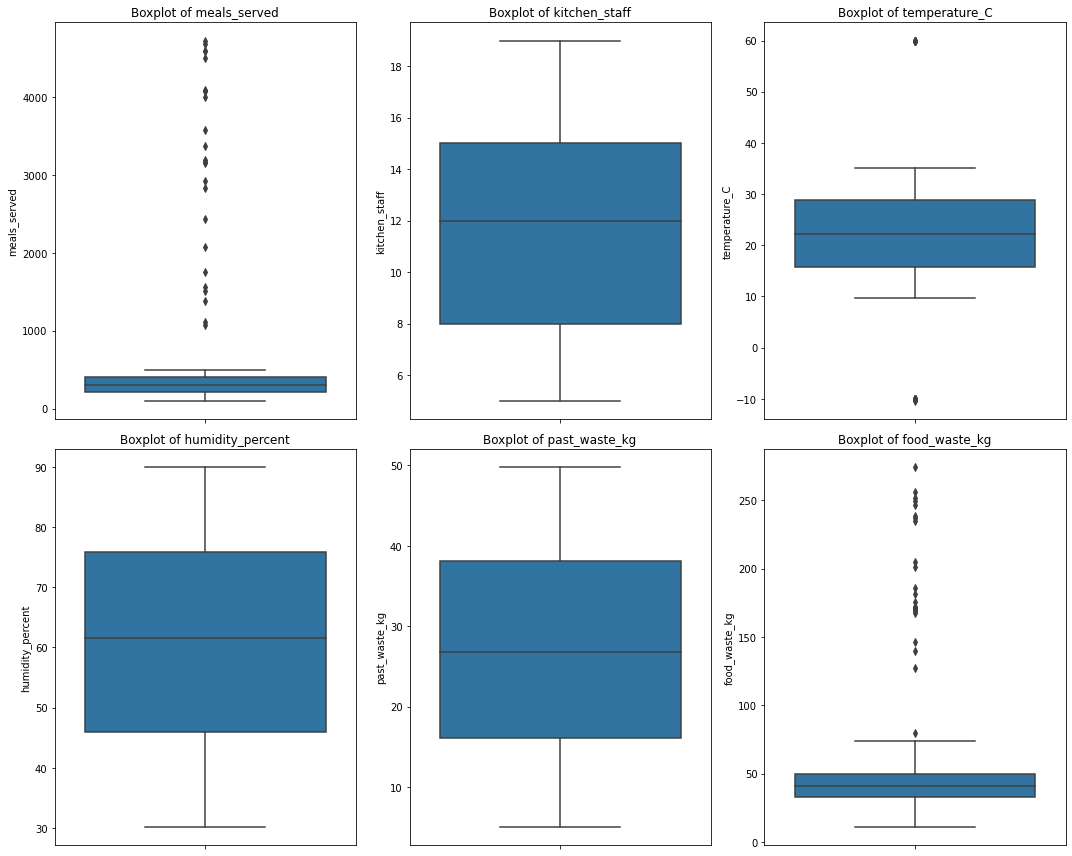

In [17]:
# Boxplots for numerical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

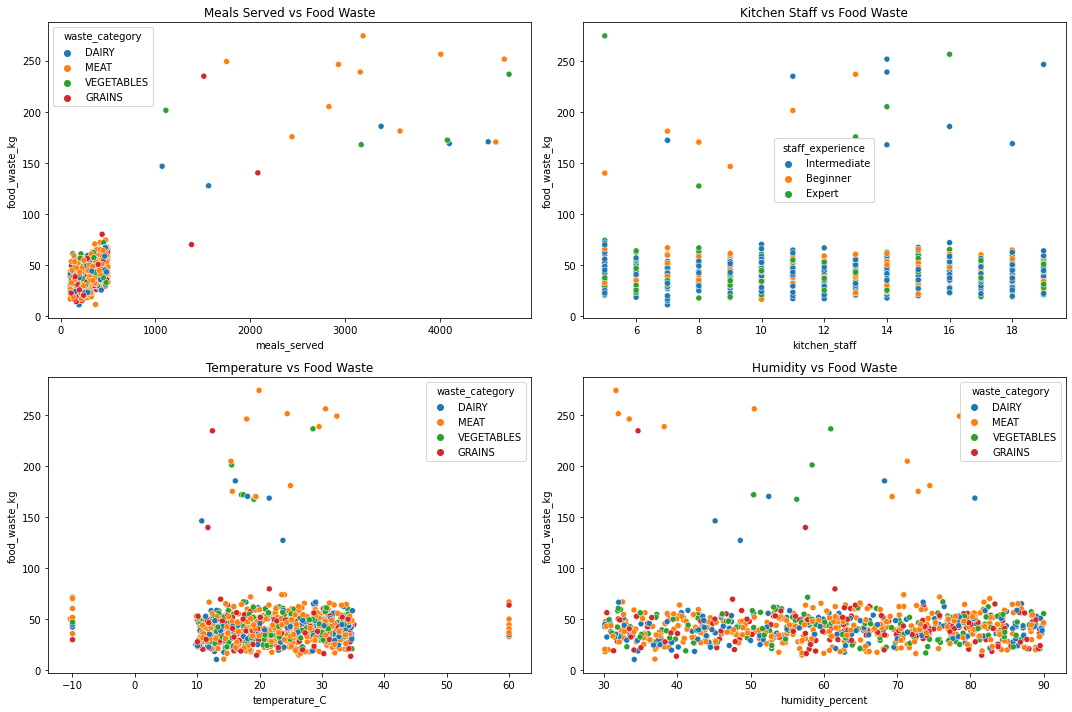

In [18]:
# Scatter plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='meals_served', y='food_waste_kg', hue='waste_category')
plt.title('Meals Served vs Food Waste')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='kitchen_staff', y='food_waste_kg', hue='staff_experience')
plt.title('Kitchen Staff vs Food Waste')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='temperature_C', y='food_waste_kg', hue='waste_category')
plt.title('Temperature vs Food Waste')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='humidity_percent', y='food_waste_kg', hue='waste_category')
plt.title('Humidity vs Food Waste')

plt.tight_layout()
plt.show()

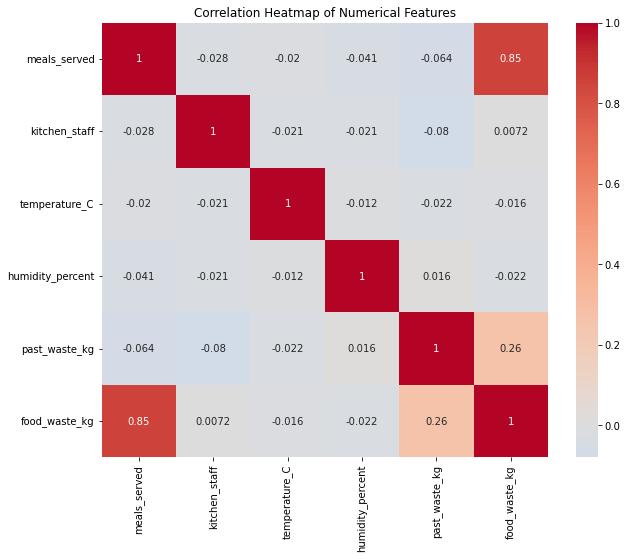

In [19]:
# Correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

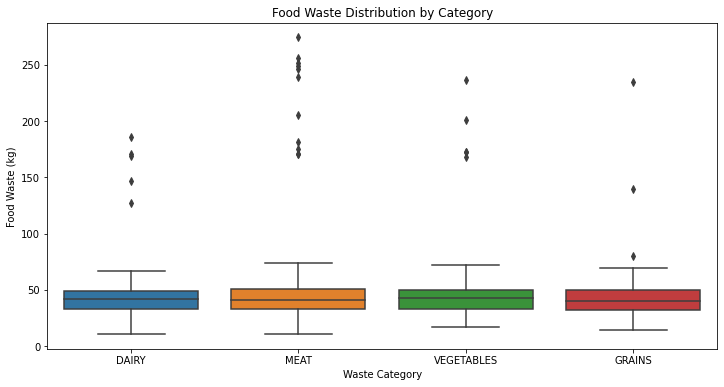

In [20]:
# Food waste by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='waste_category', y='food_waste_kg')
plt.title('Food Waste Distribution by Category')
plt.ylabel('Food Waste (kg)')
plt.xlabel('Waste Category')
plt.show()

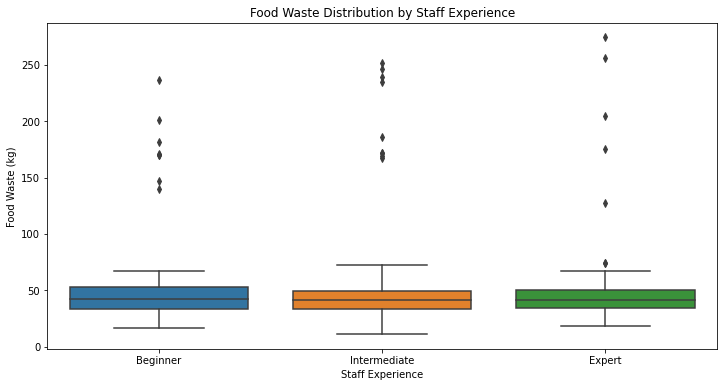

In [21]:
# Food waste by staff experience
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='staff_experience', y='food_waste_kg', 
            order=['Beginner', 'Intermediate', 'Expert'])
plt.title('Food Waste Distribution by Staff Experience')
plt.ylabel('Food Waste (kg)')
plt.xlabel('Staff Experience')
plt.show()

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

df.drop(columns=["ID","date"], inplace=True)

In [31]:
#to lowercase
df['staff_experience'] = df['staff_experience'].astype(str).str.lower().str.strip()
df['waste_category'] = df['waste_category'].astype(str).str.lower().str.strip()

# 이상치 처리
mode_temp = df['temperature_C'][(df['temperature_C'] > 0) & (df['temperature_C'] < 36)].mode()[0]
df.loc[(df['temperature_C'] <= 0) | (df['temperature_C'] >= 36), 'temperature_C'] = mode_temp

df = df[df['meals_served'] < 500]

# 수치형 결측치 처리
df['temperature_C'] = df['temperature_C'].fillna(mode_temp)
df['past_waste_kg'] = df['past_waste_kg'].fillna(df['past_waste_kg'].mean())

# experience 결측치 처리
df['staff_experience'] = df['staff_experience'].replace(['nan', 'None', 'NaN'], np.nan)
def fill_staff_experience(row):
    if pd.isnull(row['staff_experience']):
        staff = row['kitchen_staff']
        waste = row['past_waste_kg']

        if staff < 12 and waste > 20:
            return 'beginner'
        elif staff > 17 and waste < 15:
            return 'expert'
        else:
            return 'intermediate'
    return row['staff_experience']

df['staff_experience'] = df.apply(fill_staff_experience, axis=1)

# experience 수동 인코딩
experience_order = {
    'beginner': 0,
    'intermediate': 1,
    'expert': 2
}
df['staff_experience'] = df['staff_experience'].map(experience_order)

# waste_category Label 인코딩
label_encoders = {}
categorical_cols = ["waste_category"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 모든 열의 값이 정수인지 확인 (소수점 없는 값만 남김)
# df = df.applymap(lambda x: np.floor(x) if isinstance(x, (int, float)) else x)

len(df)

887

       meals_served  kitchen_staff  temperature_C  humidity_percent  \
count    887.000000     887.000000     887.000000        887.000000   
mean     301.560316      11.925592      22.034817         60.902577   
std      113.795520       4.286718       7.396415         17.370908   
min      100.000000       5.000000       9.783393         30.121111   
25%      206.000000       8.000000      15.558473         46.017835   
50%      300.000000      12.000000      22.040871         61.844241   
75%      399.000000      15.000000      28.716919         76.063850   
max      499.000000      19.000000      35.116764         89.982828   

       past_waste_kg  food_waste_kg  
count     887.000000     887.000000  
mean       27.133164      40.855427  
std        12.779273      11.650632  
min         5.008394      10.819048  
25%        16.243460      32.716159  
50%        27.068383      40.816461  
75%        38.232765      49.077606  
max        49.803703      79.933176  


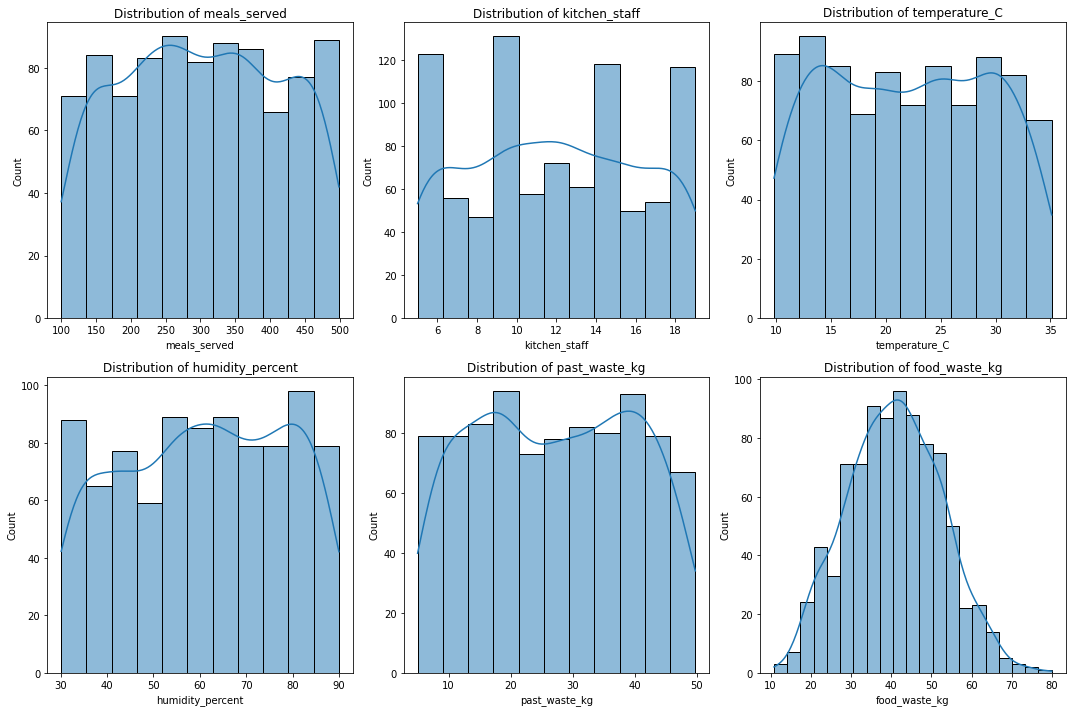

In [32]:
# Select numerical columns
numerical_cols = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 
                  'past_waste_kg', 'food_waste_kg']

# Summary statistics
print(df[numerical_cols].describe())

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

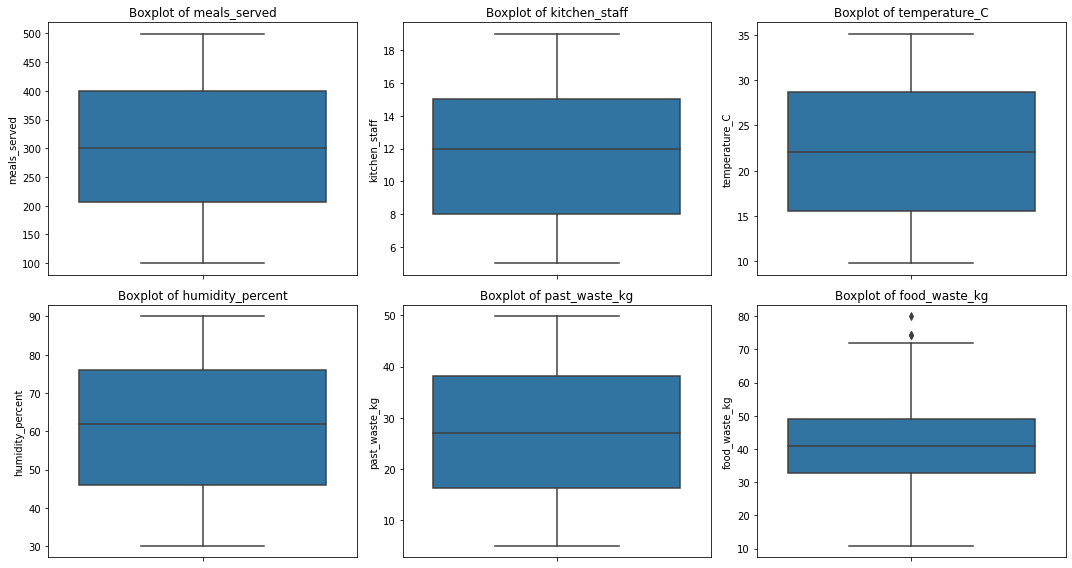

In [34]:
# Boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

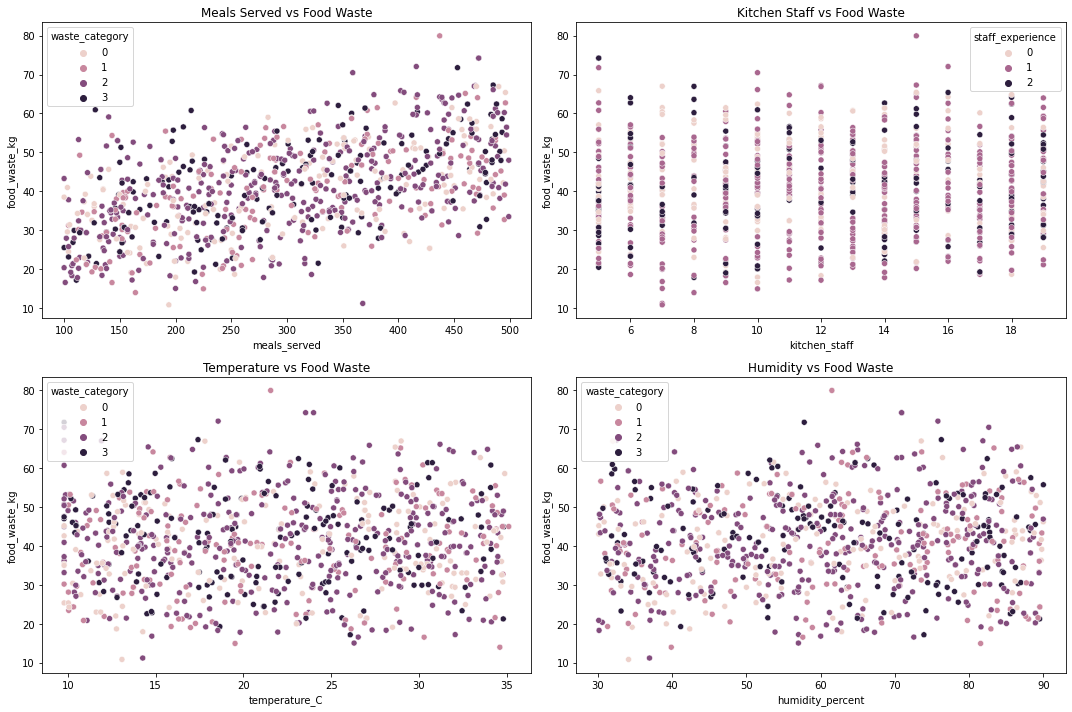

In [41]:
# Scatter plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='meals_served', y='food_waste_kg', hue='waste_category')
plt.title('Meals Served vs Food Waste')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='kitchen_staff', y='food_waste_kg', hue='staff_experience')
plt.title('Kitchen Staff vs Food Waste')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='temperature_C', y='food_waste_kg', hue='waste_category')
plt.title('Temperature vs Food Waste')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='humidity_percent', y='food_waste_kg', hue='waste_category')
plt.title('Humidity vs Food Waste')

plt.tight_layout()
plt.show()

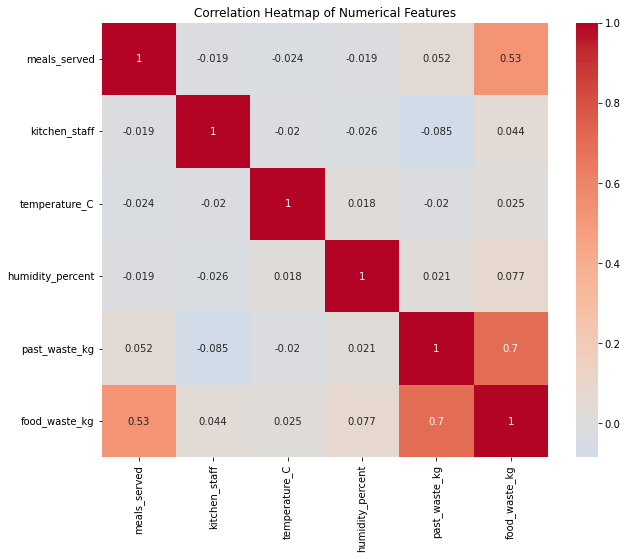

In [42]:
# Correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

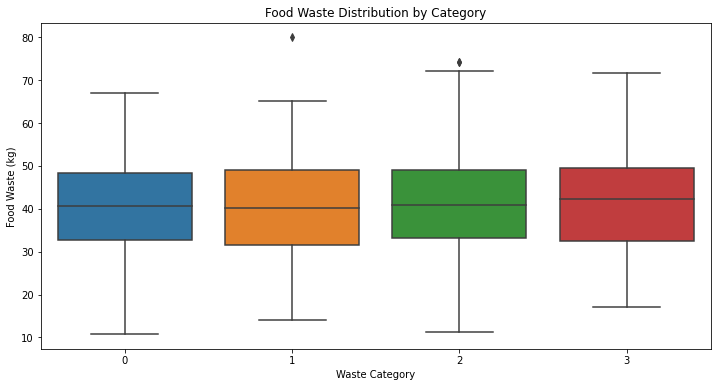

In [43]:
# Food waste by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='waste_category', y='food_waste_kg')
plt.title('Food Waste Distribution by Category')
plt.ylabel('Food Waste (kg)')
plt.xlabel('Waste Category')
plt.show()

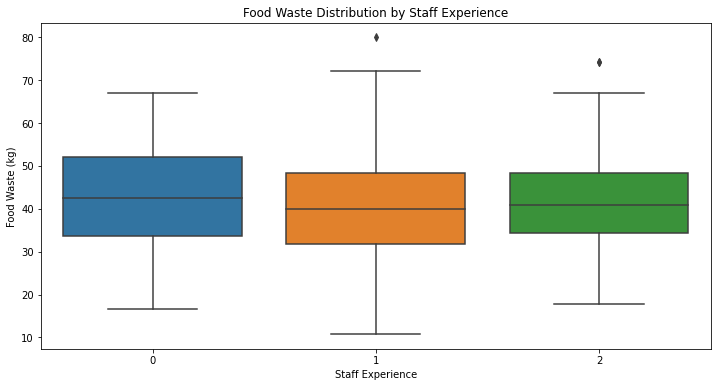

In [46]:
# Food waste by staff experience
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='staff_experience', y='food_waste_kg')
plt.title('Food Waste Distribution by Staff Experience')
plt.ylabel('Food Waste (kg)')
plt.xlabel('Staff Experience')
plt.show()

In [47]:
#order=['Beginner', 'Intermediate', 'Expert']